In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

Research Proposal:

Who do we target with our Black Friday Sale adevertising?

Imaginary Department Store is like many retail stores in that Black Friday is one of its biggest shopping days of the year. 
Next year, we want to make sure we can drive as much buying traffic as possible to each store. To do this, we want to find our
target audience and what products they buy most freqently on this day. Since it is not a normal shopping day(less people
working, lots of travel, lots of gift buying, etc.) we cannot assume it is our most freqent cliental base. This is the
group that we will target with our sale advertising next year. 

In [193]:
black_friday = pd.read_csv('/Users/justinsmith/Documents/GitHub/thinkful/BlackFriday.csv')
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [181]:
# A look at our categorical data
black_friday.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

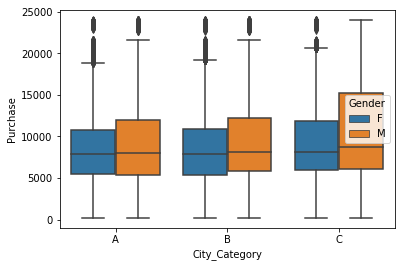

In [30]:
# Which Gender spends more money?
sns.boxplot(x='City_Category',y='Purchase',hue='Gender',data=black_friday,order=['A','B','C'])
plt.show()

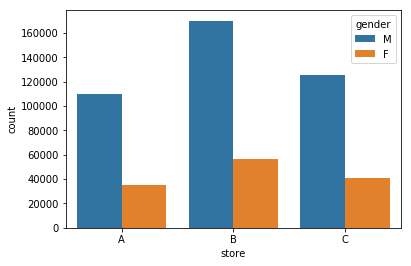

In [189]:
# Who buys more items and how does it vary by store?

df_a = black_friday[black_friday['City_Category'] == 'A']
df_b = black_friday[black_friday['City_Category'] == 'B']
df_c = black_friday[black_friday['City_Category'] == 'C']

males_city_a = df_a[df_a['Gender'] == 'M']
males_city_b = df_b[df_b['Gender'] == 'M']
males_city_c = df_c[df_c['Gender'] == 'M']

females_city_a = df_a[df_a['Gender'] == 'F']
females_city_b = df_b[df_b['Gender'] == 'F']
females_city_c = df_c[df_c['Gender'] == 'F']

count_dict = {'store':['A','A','B','B','C','C'], 'gender':['M','F','M','F','M','F'], 'count':[len(males_city_a),len(females_city_a),
                                                                    len(males_city_b),len(females_city_b),
                                                                    len(males_city_c),len(females_city_c)]}
count_by_store = pd.DataFrame(count_dict)

sns.barplot(x='store',y='count',hue='gender',data=count_by_store,order=['A','B','C'])
plt.show()

In [171]:
# Which products do we sell the most of on Black Friday?

prod_a_count = Counter(males_city_a['Product_Category_1'])
product_count_store = pd.DataFrame.from_dict(prod_a_count, orient='index').reset_index()
prod_c_count = Counter(males_city_c['Product_Category_1'])
c_count_store = pd.DataFrame.from_dict(prod_c_count, orient='index')
store_count_prod = pd.merge(product_count_store,c_count_store, right_index=True, left_index=True)
prod_b_count = Counter(males_city_b['Product_Category_1'])
b_count_store = pd.DataFrame.from_dict(prod_b_count, orient='index').reset_index()
store_count_prod = pd.merge(store_count_prod, b_count_store, on='index')
store_count_prod.head(17)

,index,0_x,0_y,0
0,8,22600,38263,32820
1,5,30251,5448,45369
2,3,3499,4443,6033
3,11,5428,2302,8174
4,2,4627,31773,7851
5,15,1442,4965,2130
6,4,2159,645,3534
7,16,2159,23765,3011
8,6,4190,100,6534
9,12,692,1297,1016


In [192]:
# It appears that products in Category 8 is close to the most purchased in every store.
# Lets verify that it is our larger cliental base doing the buying and see which age group is buying the most.

a_prod_8m = males_city_a[males_city_a['Product_Category_1'] == 8]
b_prod_8m = males_city_b[males_city_b['Product_Category_1'] == 8]
c_prod_8m = males_city_c[males_city_c['Product_Category_1'] == 8]
a_prod_8f = females_city_a[females_city_a['Product_Category_1'] == 8]
b_prod_8f = females_city_b[females_city_b['Product_Category_1'] == 8]
c_prod_8f = females_city_c[females_city_c['Product_Category_1'] == 8]
print('Males store A:',Counter(a_prod_8['Age']))
print('Males store B:',Counter(b_prod_8['Age']))
print('Males store C:',Counter(c_prod_8['Age']))
print('Females store A:', Counter(a_prod_8f['Age']))
print('Females store B:', Counter(b_prod_8f['Age']))
print('Females store C:', Counter(c_prod_8f['Age']))

Males store A: Counter({'26-35': 11051, '36-45': 4264, '18-25': 3939, '46-50': 1417, '51-55': 956, '55+': 807, '0-17': 166})
Males store B: Counter({'26-35': 12933, '36-45': 7046, '18-25': 5220, '51-55': 3037, '46-50': 2894, '55+': 1052, '0-17': 638})
Males store C: Counter({'26-35': 7103, '36-45': 5143, '18-25': 3394, '46-50': 2677, '55+': 2496, '51-55': 2390, '0-17': 562})
Females store A: Counter({'26-35': 4686, '36-45': 1814, '18-25': 1403, '51-55': 499, '0-17': 292, '46-50': 287, '55+': 107})
Females store B: Counter({'26-35': 5210, '36-45': 2568, '18-25': 2399, '46-50': 1743, '51-55': 1298, '55+': 448, '0-17': 315})
Females store C: Counter({'26-35': 2550, '36-45': 2084, '46-50': 1475, '18-25': 1310, '55+': 1197, '51-55': 1022, '0-17': 240})


In [191]:
# Lastly, let's make sure these numbers aren;t skewed from individual buyers, buying large amounts.

df_a_8 = df_a[df_a['Product_Category_1'] == 8]
print(df_a_8.nunique())
df_a8m = df_a_8[df_a_8['Gender'] == 'M']
print(df_a8m.nunique())
df_b_8 = df_b[df_b['Product_Category_1'] == 8]
print(df_b_8.nunique())
df_b8m = df_b_8[df_b_8['Gender'] == 'M']
print(df_b8m.nunique())
df_c_8 = df_c[df_c['Product_Category_1'] == 8]
print(df_c_8.nunique())
df_c8m = df_c_8[df_c_8['Gender'] == 'M']
print(df_c8m.nunique())

User_ID                       1018
Product_ID                     989
Gender                           2
Age                              7
Occupation                      21
City_Category                    1
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1               1
Product_Category_2              10
Product_Category_3               5
Purchase                      1927
dtype: int64
User_ID                        727
Product_ID                     966
Gender                           1
Age                              7
Occupation                      20
City_Category                    1
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1               1
Product_Category_2              10
Product_Category_3               5
Purchase                      1905
dtype: int64
User_ID                       1658
Product_ID                     967
Gender                           2
Age                          

The Potential Solution:

Products in Category 8 have a high sales volumn in every store. More importantly, it represents our overall base well for 
Black Friday with males making approxiamtely 60-70% of total purchase volumn and roughtly the same in category 8. 
Furthermore, age range 26-35 is the leading age range for both genders and all three stores. Therefore, we are going
focus our adevertising on males 26-35 for products in Category 8 for next years Black Friday sales. 

Hypothesis: Focusing our Black Friday Sales Adevertising on Males 26-35 for product category 8 will increase sales. 

Split Test:

The strategy for this split test will be to target our advertising campaign for Product Category 8 to males
between the ages of 26-35 for both stores A and B. There are two reasons for this. First, the total volumn
of unique individual buyers for these two stores is roughly the same as store C. Second, This will help
to control for affects that might be related to an individual location. Combining this with the previous 
year(s) data should give us a clear picture as to whether the advertisment works to bring in more customers.

For the test to be a success we want to see a 10% increase in sales from each store from males for items in 
Category 8 for both stores A and B. We also will run t-test and get p-value looking for a p-value of<=0.05.